In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Dataset imports

In [2]:
# get training and validation data
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/Users/mantagaori/Desktop/comp473/COMP_473_Project/TrainSet2-new', 
    image_size = (48,48), # our original dataset is 48 pixels by 48 pixels
    batch_size = 20 # pick 12 images and trin until all dataset is used <= repeat this for each epoche
)


val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/Users/mantagaori/Desktop/comp473/COMP_473_Project/ValSet2-new', 
    image_size = (48,48), 
    batch_size = 20
)

Found 2760 files belonging to 7 classes.
Found 705 files belonging to 7 classes.


### Training metrics graph

In [3]:
from IPython.display import clear_output

class PlotTrain(tf.keras.callbacks.Callback):

    def on_train_begin(self,logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []

    def on_epoch_end(self,epoch,logs={}):
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]

        #To plot the graph
        metrics = [x for x in logs if 'val' not in x]

        f, axs = plt.subplots(1, len(metrics), figsize = (15,5))
        clear_output(wait=True)

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2), self.metrics[metric], label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2), self.metrics['val_' + metric], label = 'val_'+metric)
        
        axs[i].legend()
        axs[i].grid()
        plt.tight_layout()
        plt.show()

### No Pre-Processing Model

In [4]:
model = tf.keras.Sequential([

    tf.keras.layers.Conv2D( 32, (3,3), padding='same' , activation='relu', input_shape=(48,48,3)), 
    
    # pooling layer (Downsampling)
    # downsize 2,2 pixels to 1,1
    tf.keras.layers.MaxPooling2D((2,2)),

    # Flatten-Dense
    tf.keras.layers.Flatten(), 
    
    ## 1st layer
    # number inside Dense is the number of nodes. usually use 2^n
    tf.keras.layers.Dense(64, activation="relu"), 
    
    # helps prevent overfittng
    tf.keras.layers.Dropout(0.2),

    ## second layer. we must have 7 final nodes because we have 7 classes.
    # softmax: compress resulting number between 0~1, used in category problems. 
    # If you add up the probability of each class we get 1. 
    tf.keras.layers.Dense(7, activation="softmax") 
])



#### Training the no-preprocessing model 

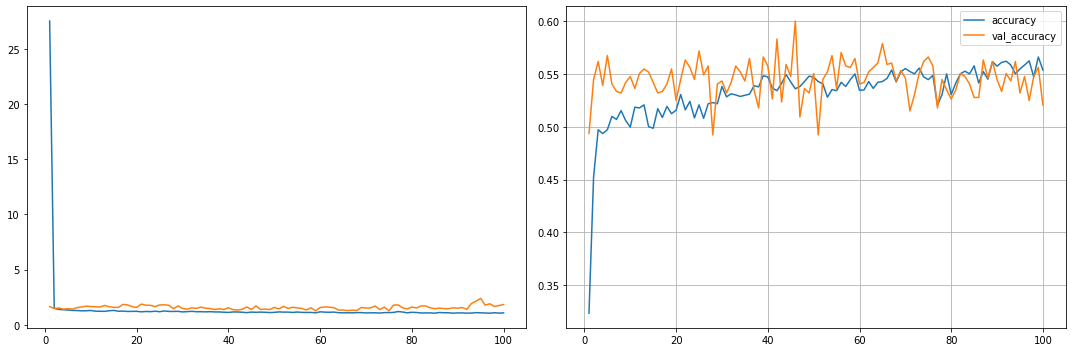

138/138 [==============================] - 8s 55ms/step - loss: 1.0759 - accuracy: 0.5536 - val_loss: 1.8226 - val_accuracy: 0.5206


In [5]:
# compile and fit our model
callback_list = [PlotTrain()]
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam" , metrics=['accuracy'])
model.fit(train_ds, validation_data=val_ds, epochs=100, callbacks=callback_list)

##### Summary of No Pre-Processing model

In [6]:
model.summary()
model.save("model1_data2.h5")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 64)                1179712   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 455       
                                                        

#### Classification Test: No Pre-Processing Model

In [30]:

test_dir = '/Users/mantagaori/Desktop/comp473/COMP_473_Project/TestSet2-new'
test_generator = tf.keras.preprocessing.image.ImageDataGenerator()
test_ds = test_generator.flow_from_directory(test_dir, target_size=(48,48), batch_size=20, shuffle=False)


Found 1440 images belonging to 7 classes.


In [32]:
y_true = test_ds.classes
true_class = []
for i in y_true:
    if(i==0):
        true_class+=['anger']
    if(i==1):
        true_class+=['contempt']
    if(i==2):
        true_class+=['disgust']
    if(i==3):
        true_class+=['fear']
    if(i==4):
        true_class+=['happy']
    if(i==5):
        true_class+=['sadness']
    if(i==6):
        true_class+=['surprise']

In [33]:

y_predict= model.predict(test_ds)
classes_x = np.argmax(y_predict, axis=1)

predicted_class = []


for i in classes_x:
    if(i==0):
        predicted_class+=['anger']
    if(i==1):
        predicted_class+=['contempt']
    if(i==2):
        predicted_class+=['disgust']
    if(i==3):
        predicted_class+=['fear']
    if(i==4):
        predicted_class+=['happy']
    if(i==5):
        predicted_class+=['sadness']
    if(i==6):
        predicted_class+=['surprise']

# for j in predicted_class:
#     print(j)



72/72 [==============================] - 3s 33ms/step
sadness
sadness
anger
anger
anger
sadness
sadness
anger
anger
anger
sadness
sadness
anger
anger
anger
anger
anger
anger
anger
anger
sadness
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger
sadness
anger
anger
anger
anger
sadness
anger
anger
anger
anger
sadness
anger
anger
anger
anger
sadness
anger
anger
anger
anger
disgust
sadness
happy
happy
happy
sadness
sadness
sadness
happy
sadness
happy
sadness
happy
happy
happy
sadness
sadness
sadness
anger
sadness
sadness
sadness
sadness
anger
sadness
sadness
sadness
sadness
anger
sadness
anger
anger
anger
anger
anger
anger
anger
anger
sadness
anger
anger
anger
anger
sadness
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger
anger


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       anger       0.72      0.70      0.71       195
    contempt       0.00      0.00      0.00        75
     disgust       0.38      0.01      0.02       270
        fear       0.33      0.02      0.04       105
       happy       0.46      0.99      0.62       315
     sadness       0.17      0.22      0.19       120
    surprise       0.90      0.99      0.94       360

    accuracy                           0.58      1440
   macro avg       0.42      0.42      0.36      1440
weighted avg       0.53      0.58      0.49      1440



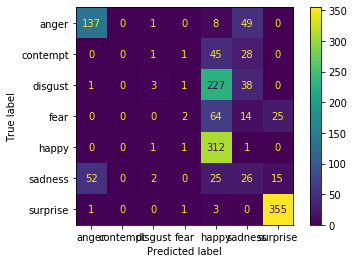

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
classes =['anger', 'contempt', 'disgust','fear','happy', 'sadness','surprise']

print(classification_report(true_class, predicted_class))
cf_model = confusion_matrix(true_class, predicted_class, labels=classes)

color = 'pink'
disp = ConfusionMatrixDisplay(confusion_matrix=cf_model, display_labels=classes)
disp.plot()
plt.show()

### Image Cropping

In [24]:
#dataset of cropped images
crop_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/Users/mantagaori/Desktop/comp473/COMP_473_Project/TrainSet2-new', 
    image_size = (48,48), # our original dataset is 48 pixels by 48 pixels
    batch_size = 20 # pick 12 images and trin until all dataset is used <= repeat this for each epoche
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/Users/mantagaori/Desktop/comp473/COMP_473_Project/TestSet2-new', 
    image_size = (48,48), 
    batch_size = 20
)

model2 = tf.keras.Sequential([
    tf.keras.layers.Cropping2D(cropping=((10,10),(10,3)), input_shape = (48, 48, 3)),
    tf.keras.layers.Conv2D( 32, (3,3), padding='same' , activation='relu', input_shape=(48,48,3)), 
    # pooling layer (Downsampling)
    # downsize 2,2 pixels to 1,1
    tf.keras.layers.MaxPooling2D((2,2)),

    # Flatten-Dense
    tf.keras.layers.Flatten(), 
    ## 1st layer
    tf.keras.layers.Dense(64, activation="relu"), # number inside Dense is the number of nodes. usually use 2^n
    tf.keras.layers.Dropout(0.2), # helps prevent overfittng
    ## second layer. we must have 7 final nodes because we have 7 classes.
    tf.keras.layers.Dense(7, activation="softmax") # softmax: compress resulting number between 0~1, used in category problems. If you add up the probability of each class we get 1. 
])
# model2.add(tf.keras.layers.Cropping2D(cropping=((10,10),(10,3))))
model2.summary()


Found 3465 files belonging to 7 classes.
Found 1440 files belonging to 7 classes.
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cropping2d_4 (Cropping2D)   (None, 28, 35, 3)         0         
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 35, 32)        896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 14, 17, 32)       0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 7616)              0         
                                                                 
 dense_22 (Dense)            (None, 64)                487488    
                                                                 
 dropout_11 (Dropout)        (None, 6

In [ ]:
#TODO
# #example of a cropped input image
# outputs_cropped = model2.predict(val_ds)
# outputs = outputs_cropped[0]

# #visualization
# plt.imshow(outputs)


In [25]:
model2.compile(loss="sparse_categorical_crossentropy", optimizer="adam" , metrics=['accuracy'])
model2.fit(crop_train_ds, validation_data=val_ds, epochs=100)

Epoch 1/100
174/174 [==============================] - 8s 35ms/step - loss: 16.1165 - accuracy: 0.3134 - val_loss: 1.6342 - val_accuracy: 0.4521
Epoch 2/100
174/174 [==============================] - 5s 29ms/step - loss: 1.6058 - accuracy: 0.4014 - val_loss: 1.5661 - val_accuracy: 0.4660
Epoch 3/100
174/174 [==============================] - 6s 31ms/step - loss: 1.5848 - accuracy: 0.4084 - val_loss: 1.5550 - val_accuracy: 0.4396
Epoch 4/100
174/174 [==============================] - 6s 33ms/step - loss: 1.5302 - accuracy: 0.4081 - val_loss: 1.5100 - val_accuracy: 0.4667
Epoch 5/100
174/174 [==============================] - 6s 36ms/step - loss: 1.5162 - accuracy: 0.4055 - val_loss: 1.4983 - val_accuracy: 0.4674
Epoch 6/100
174/174 [==============================] - 5s 30ms/step - loss: 1.4875 - accuracy: 0.4124 - val_loss: 1.5170 - val_accuracy: 0.4653
Epoch 7/100
174/174 [==============================] - 6s 33ms/step - loss: 1.5180 - accuracy: 0.4061 - val_loss: 1.4470 - val_accuracy